In [55]:
from collections import Counter
from __future__ import annotations
import random
import copy
import matplotlib.pyplot as plt

In [56]:
class Card:
    def __init__(self, name:str, shuffle:bool):
        self.name = name
        self.shuffle = shuffle

    def __str__(self):
        return f'Card("{self.name}", {self.shuffle})'
    
    def __repr__(self):
        return f'Card("{self.name}", {self.shuffle})'

In [120]:
class Gloom_Haven_MC_Boss:
    def __init__(self, cards: list[Card], run_counter: int):
        self.original_list_of_cards = cards
        self.run_counter = run_counter
        self.card_occurances: dict = dict.fromkeys(list(set([card.name for card in cards])), 0)

    def gen_cards_list(self):
        return copy.deepcopy(self.original_list_of_cards)

    def shuffle_the_cards(self):
        self.cards_list = self.gen_cards_list()
        random.shuffle(self.cards_list)
        #print(self.cards_list)
        

    def update_card_dict(self, card:Card):
        self.card_occurances[card.name] += 1

    def return_stats(self):
        total_occurances = sum(self.card_occurances.values())

        print("Odds of a boss playing a card before deck reshuffle:")
        
        for name, card_occurance in self.card_occurances.items():
            print(f'{name}: {round(card_occurance/total_occurances, 3)}')


        plt.title('Probability of each card being played before desk reshuffle')
        plt.xlabel('card type')
        plt.ylabel('Probability of Occurance (%)')
        total = sum(self.card_occurances.values(), 0.0)
        plt.bar(self.card_occurances.keys(), [round((x/total)*100, 2) for x in self.card_occurances.values()])

    def run(self):
        num_of_cards_left_before_shuffle = []
        while self.run_counter > 0:
            #print("counter: ", self.run_counter)
            self.shuffle_the_cards()
            #print(self.cards_list)
            deck = self.cards_list
            shuffle = False
            shuffle_position = 1
            while not shuffle:
                
                card: Card = deck.pop()
                self.update_card_dict(card)
                
                if card.shuffle is True:
                    shuffle = card.shuffle
                    num_of_cards_left_before_shuffle.append(shuffle_position)
                    

                shuffle_position += 1

            self.shuffle_the_cards()
            self.run_counter -= 1
        
        self.return_stats()

        return num_of_cards_left_before_shuffle





    

In [121]:
card_list = [Card("Special 1", True),
             Card("Special 1", False), 
             Card("Special 1", False), 
             Card("Special 2", True),
             Card("Special 2", False),
             Card("Special 2", False),
             Card("Melee", False),
             Card("Range", False),
             ]

In [122]:
runner = Gloom_Haven_MC_Boss(card_list, 1_000_000)

Odds of a boss playing a card before deck reshuffle:
Range: 0.111
Special 1: 0.389
Special 2: 0.389
Melee: 0.111


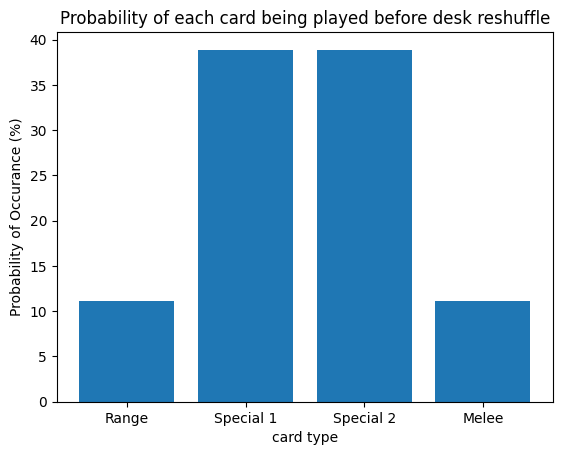

In [123]:
num_of_cards_left_before_shuffle = runner.run()

<BarContainer object of 7 artists>

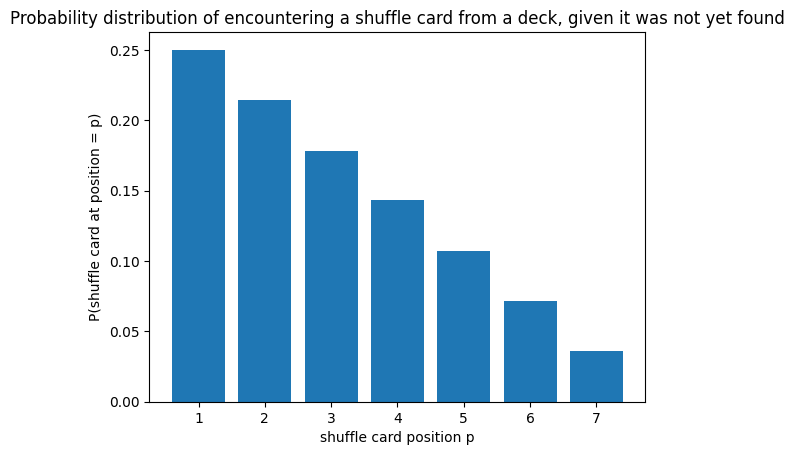

In [104]:
m = Counter(num_of_cards_left_before_shuffle)
k=m
total = sum(k.values(), 0.0)
for key in k:
    k[key] /= total

# Add title and axis names
plt.title('Probability distribution of encountering a shuffle card from a deck, given it was not yet found')
plt.xlabel('shuffle card position p')
plt.ylabel('P(shuffle card at position = p)')
plt.bar(k.keys(), k.values())

In [105]:
for key, value in sorted(k.items()):
    print(f"P(shuffle card at position = {key} | shuffle card was not at p={(set(range(key-1, 0, -1)))}) = {round(value, 4)}")

P(shuffle card at position = 1 | shuffle card was not at p=set()) = 0.2502
P(shuffle card at position = 2 | shuffle card was not at p={1}) = 0.2141
P(shuffle card at position = 3 | shuffle card was not at p={1, 2}) = 0.1781
P(shuffle card at position = 4 | shuffle card was not at p={1, 2, 3}) = 0.1431
P(shuffle card at position = 5 | shuffle card was not at p={1, 2, 3, 4}) = 0.1073
P(shuffle card at position = 6 | shuffle card was not at p={1, 2, 3, 4, 5}) = 0.0715
P(shuffle card at position = 7 | shuffle card was not at p={1, 2, 3, 4, 5, 6}) = 0.0357


In [111]:
for key, value in sorted(k.items()):
    print(f"P(shuffle card at position = {key} | was not found yet) = {round(value*100, 1)}%")

P(shuffle card at position = 1 | was not found yet) = 25.0%
P(shuffle card at position = 2 | was not found yet) = 21.4%
P(shuffle card at position = 3 | was not found yet) = 17.8%
P(shuffle card at position = 4 | was not found yet) = 14.3%
P(shuffle card at position = 5 | was not found yet) = 10.7%
P(shuffle card at position = 6 | was not found yet) = 7.1%
P(shuffle card at position = 7 | was not found yet) = 3.6%


In [80]:
len(k)

7